<a href="https://colab.research.google.com/github/Shilajit-CR7/ML-Works/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
ytest.shape

(10000,)

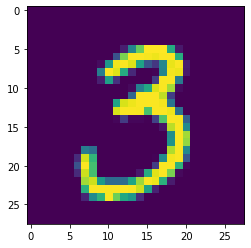

In [ ]:
plt.imshow(xtest[90])

In [ ]:
ytest[90]

3

In [ ]:
x = xtest.reshape(-1,28*28)
y = ytest
x.shape

(10000, 784)

# Preprocess the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_ = sc.fit_transform(x) ## mean = 0, std = 1

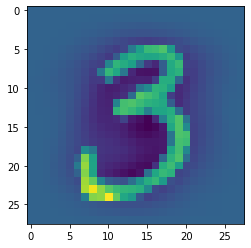

In [ ]:
plt.imshow(X_[90].reshape(28,28))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) ## From (m,784) ==> (m,2)

In [ ]:
z_pca = pca.fit_transform(X_)

In [ ]:
z_pca.shape

(10000, 2)

In [ ]:
z_pca

array([[-5.45834516,  6.41427317],
       [ 2.80440948, -8.0286551 ],
       [-7.41122831, -3.86419765],
       ...,
       [-5.00432044,  1.15332051],
       [-1.42074261, -4.42446699],
       [13.14258582, -4.26194412]])

In [ ]:
pca.explained_variance_
# 41.39 % variance coming from 1st Column
# 28.35% variance coming from 2nd Column
# Total 70% of the variance so 30% info loss

array([41.39893397, 28.35105775])

# Custom PCA

In [ ]:
covar = np.dot(X_.T,X_)
covar.shape

(784, 784)

In [ ]:
#Eigen vectors using SVD
from numpy.linalg import svd

In [ ]:
u,s,v = svd(covar)

In [ ]:
u_red = u[:,:2]

In [ ]:
u_red.shape

(784, 2)

In [ ]:
z = np.dot(X_,u_red)

In [ ]:
z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

# Visulization

In [ ]:
new = np.hstack((z,y.reshape(-1,1)))

In [ ]:
new ## Image label is added 

array([[  5.45831116,  -6.41400668,   7.        ],
       [ -2.80443233,   8.02885014,   2.        ],
       [  7.41124146,   3.86404387,   1.        ],
       ...,
       [  5.00435204,  -1.15364641,   4.        ],
       [  1.42085442,   4.42308066,   5.        ],
       [-13.14268302,   4.26280299,   6.        ]])

In [ ]:
df = pd.DataFrame(new,columns=['PC1','PC2','Label'])

In [ ]:
df

,PC1,PC2,Label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0
...,...,...,...
9995,-3.579478,3.367965,2.0
9996,-3.244816,1.981771,3.0
9997,5.004352,-1.153646,4.0
9998,1.420854,4.423081,5.0


C:\Users\Shilajit-CR7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

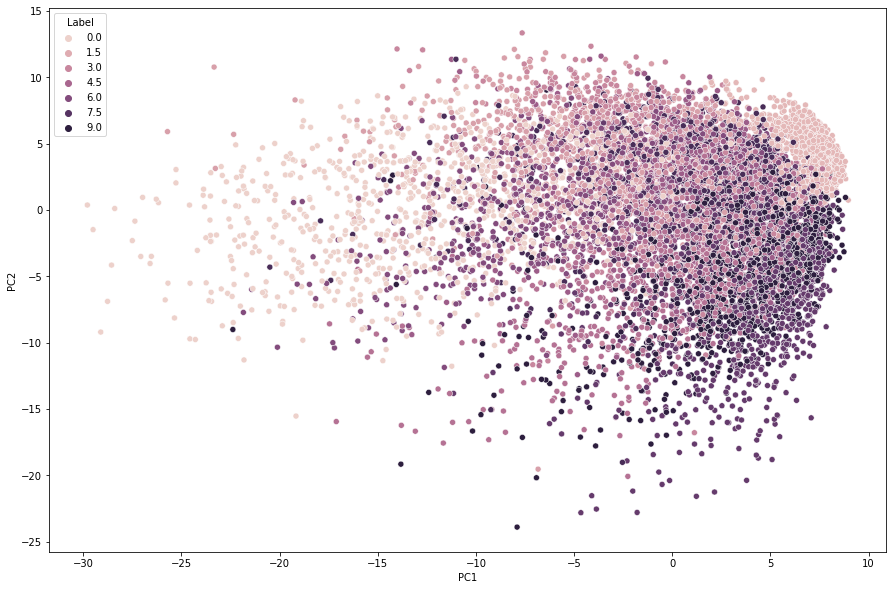

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['PC1'],df['PC2'],hue='Label',data=df)

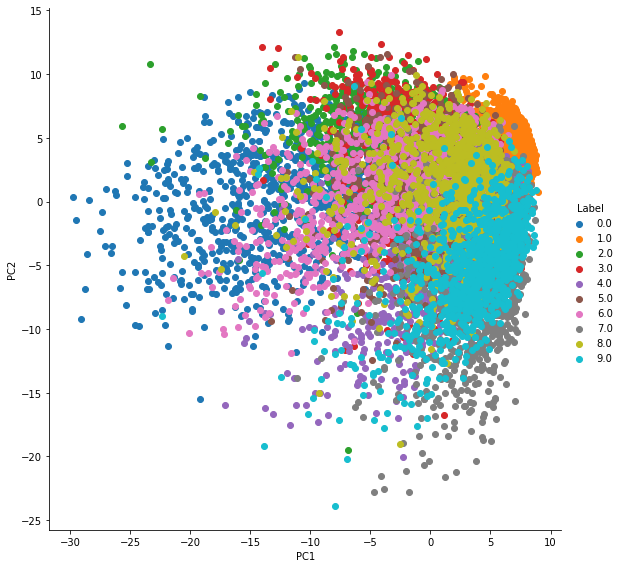

In [ ]:
fg = sns.FacetGrid(df,hue='Label',height=8)
# FacetGrid can be used with differnt sns plots (ex: scatter, distplot, histplot, relplot etc)
fg.map(plt.scatter,'PC1','PC2')
fg.add_legend()
plt.show()

In [ ]:
pca = PCA()

In [ ]:
z_pca = pca.fit_transform(X_)

In [ ]:
z_pca.shape

(10000, 784)

In [ ]:
pca.explained_variance_
#it shows 784 to 1 feature variance 

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [ ]:
pca.explained_variance_ratio_
# 784 to 1

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [ ]:
cum_var_sum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
cum_var_sum

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

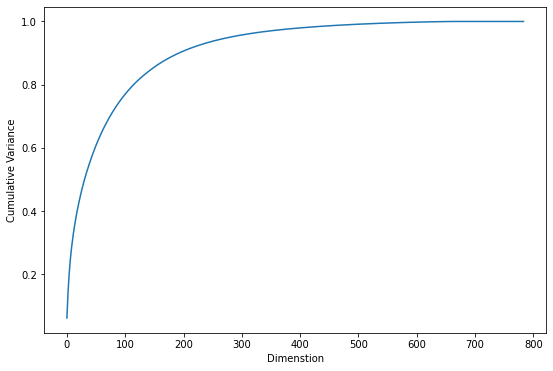

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(cum_var_sum)
plt.xlabel('Dimenstion')
plt.ylabel('Cumulative Variance')
plt.show()
# From the plot we can see at almost 300 features the variance is 1.
# So if we reduce the data from 784 features to 300 features then it will get the full info.
# This way is good to see actually how many features we want to take 